  ## ROC CURVES  ###

In [55]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, validation_curve, learning_curve, train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [41]:
os.getcwd()

'C:\\Users\\Landry B. Keyanfe\\Desktop\\introanalytic\\project'

### DATA PREPROCESSING

In [2]:
# cleaned_encode2.csv
clean = pd.read_csv('cleaned_encode2.csv')
clean.head()

,alias,pdox_b1_id,Project_Status,ReviewCycle,TaskName,elapsed_workdays,RC_HowAssigned,job_class,AGENCY,Ward,...,Structural Review,WASA Review,WMATA Review,White House Review,Zoning Review,EYFC,elapsed_workdays_7,elapsed_workdays_14,elapsed_workdays_21,elapsed_workdays_28
0,1,B1802095,0,1.0,0,7.0,0,6,1,1.0,...,0,0,0,0,0,52.0,0,0,0,0
1,1,B1802095,0,1.0,0,3.0,0,6,0,1.0,...,0,0,0,0,0,52.0,0,0,0,0
2,1,B1802095,0,1.0,0,2.0,0,6,0,1.0,...,0,0,0,0,0,52.0,0,0,0,0
3,1,B1802095,0,3.0,0,19.0,1,6,0,1.0,...,0,0,0,0,0,52.0,1,1,0,0
4,1,B1802095,0,3.0,0,6.0,1,6,0,1.0,...,0,0,0,0,0,52.0,0,0,0,0


In [7]:
 #create feature matrix and target array

X = clean.drop(["elapsed_workdays","pdox_b1_id","elapsed_workdays_7","elapsed_workdays_14","elapsed_workdays_21","elapsed_workdays_28"], axis = 1)
Y = clean["elapsed_workdays_7"]
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: elapsed_workdays_7, dtype: int64

In [13]:
X.shape

(37465, 48)

### elapsed workdays = 7

## naive bayes

In [118]:
# 1- Fitting a Naive Bayes model
bayes= GaussianNB()
bayes.fit(X,Y)

GaussianNB(priors=None)

In [119]:
# 2- Performing  10-fold cross-validation
cross_val_score(bayes, X, Y, cv=10)

array([0.61889512, 0.61836136, 0.65705898, 0.70616493, 0.68534828,
       0.72671471, 0.62973839, 0.71115857, 0.62600107, 0.56128171])

In [120]:
# Determining the size of the trainning set
sizes = np.arange(1500, 30000,1000)
print('Sizes: ', sizes)
train_sizes, train_scores2, test_scores2 = learning_curve(bayes, X, Y, cv=10, train_sizes=sizes)
train_mean2 = np.mean(train_scores2, axis=1)
test_mean2 = np.mean(test_scores2, axis=1)
test_mean2

Sizes:  [ 1500  2500  3500  4500  5500  6500  7500  8500  9500 10500 11500 12500
 13500 14500 15500 16500 17500 18500 19500 20500 21500 22500 23500 24500
 25500 26500 27500 28500 29500]


array([0.57317137, 0.64545011, 0.63001894, 0.64871476, 0.56726611,
       0.57161546, 0.65831894, 0.66790472, 0.68303806, 0.68225915,
       0.67499714, 0.67604012, 0.6726485 , 0.68773306, 0.68423647,
       0.68797521, 0.69139268, 0.69219518, 0.69224868, 0.68669885,
       0.6954545 , 0.68501647, 0.69054183, 0.69118242, 0.69529324,
       0.69387805, 0.68904595, 0.69072759, 0.68429388])

In [121]:
# split training and test 
training_size = 17500
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, train_size=training_size, 
                                                test_size=X.shape[0]-training_size)
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.10,random_state=0) 
                                                
bayes.fit(Xtrain, ytrain)
y_pred = bayes.predict(Xtest)

In [122]:

# true positives and false positives
false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, y_pred, pos_label=1)
rates = pd.DataFrame(dict(fpr=false_positive_rate, tpr=true_positive_rate))
roc_auc = auc(rates['fpr'], rates['tpr'])
print('AUC SVC: ', roc_auc)

AUC SVC:  0.6652697302697302


### Decision three

In [123]:
#Decision three
# Fit model
dt = tree.DecisionTreeClassifier()
dt.fit(X,Y)
ydt_pred = dt.predict(X.values)

In [124]:
cross_val_score(dt, X, Y, cv=10)

array([0.66479851, 0.55137443, 0.60741927, 0.43421404, 0.38297305,
       0.28609554, 0.19861185, 0.27015483, 0.31740523, 0.56128171])

In [125]:

dt.fit(Xtrain, ytrain)
y_pred2 = dt.predict(Xtest)

In [126]:
# true positives and false positives
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(ytest, y_pred2, pos_label=1)
rates2 = pd.DataFrame(dict(fpr2=false_positive_rate2, tpr2=true_positive_rate2))
roc_auc2 = auc(rates2['fpr2'], rates2['tpr2'])
print('AUC Naive Bayes: ', roc_auc2)

AUC Naive Bayes:  0.7570729270729271


## Logit 

In [127]:
#fit logit model
logreg = LogisticRegression()
logreg.fit(X,Y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
cross_val_score(logreg, X, Y, cv=10)

array([0.5382973 , 0.5382973 , 0.5382973 , 0.5382973 , 0.5382973 ,
       0.5382973 , 0.53817405, 0.53817405, 0.53817405, 0.53831776])

In [129]:
dt.fit(Xtrain, ytrain)
y_pred3 = logreg.predict(Xtest)

In [130]:
# true positives and false positives
false_positive_rate3, true_positive_rate3, thresholds3= roc_curve(ytest, y_pred3, pos_label=1)
rates3 = pd.DataFrame(dict(fpr3=false_positive_rate3, tpr3=true_positive_rate3))
roc_auc3 = auc(rates3['fpr3'], rates3['tpr3'])
print('AUC Naive Bayes: ', roc_auc3)

AUC Naive Bayes:  0.5


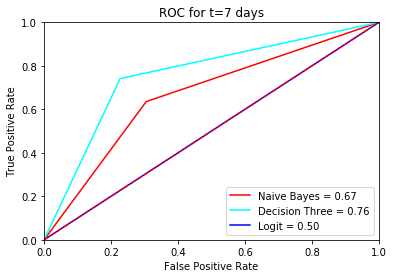

In [131]:
#ROC curve elapsed workdays=7
plt.plot(rates.fpr, rates.tpr, 'b',color='red', label = 'Naive Bayes = %0.2f' % roc_auc)
plt.plot(rates2.fpr2, rates2.tpr2, 'b',color="cyan" ,label = 'Decision Three = %0.2f' % roc_auc2)
plt.plot(rates3.fpr3, rates3.tpr3, 'b',color='blue',label = 'Logit = %0.2f' % roc_auc3)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC for t=7 days')
plt.legend(loc = 'lower right')
plt.show()

## elapsed workdays 14

In [132]:
# data preprocessing
X2 = clean.drop(["elapsed_workdays","pdox_b1_id","elapsed_workdays_7","elapsed_workdays_14","elapsed_workdays_21","elapsed_workdays_28"], axis = 1)
Y2 = clean["elapsed_workdays_14"]
Y2.head()

0    0
1    0
2    0
3    1
4    0
Name: elapsed_workdays_14, dtype: int64

## naive bayes

In [133]:
#Fitting a Naive Bayes model
bayes.fit(X2,Y2)

GaussianNB(priors=None)

In [134]:
# Performing  10-fold cross-validation
cross_val_score(bayes, X2, Y2, cv=10)

array([0.75900721, 0.72884975, 0.74539632, 0.72564718, 0.7173739 ,
       0.73658927, 0.72297838, 0.72343833, 0.72870494, 0.72363151])

In [135]:
# split training and test 
training_size = 17500
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X2, Y2, train_size=training_size, 
                                                test_size=X.shape[0]-training_size)
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.10,random_state=0) 
                                                
bayes.fit(Xtrain2, ytrain2)
y_pred4 = bayes.predict(Xtest2)

In [136]:
# true positives and false positives
false_positive_rate4, true_positive_rate4, thresholds4 = roc_curve(ytest2, y_pred4, pos_label=1)
rates4 = pd.DataFrame(dict(fpr4=false_positive_rate4, tpr4=true_positive_rate4))
roc_auc4 = auc(rates4['fpr4'], rates4['tpr4'])
print('AUC SVC: ', roc_auc4)

AUC SVC:  0.5274532146904776


## Decision three

In [137]:
#Decision three
# Fit model
dt.fit(X2,Y2)
ydt_pred2 = dt.predict(X.values)

In [138]:
cross_val_score(dt, X2, Y2, cv=10)

array([0.67520683, 0.62103016, 0.69015212, 0.49959968, 0.6271684 ,
       0.55431011, 0.56445156, 0.58595836, 0.61388518, 0.72416555])

In [139]:
dt.fit(Xtrain2, ytrain2)
y_pred5 = dt.predict(Xtest2)

In [140]:
# true positives and false positives
false_positive_rate5, true_positive_rate5, thresholds5 = roc_curve(ytest2, y_pred5, pos_label=1)
rates5 = pd.DataFrame(dict(fpr5=false_positive_rate5, tpr5=true_positive_rate5))
roc_auc5 = auc(rates5['fpr5'], rates5['tpr5'])
print('AUC SVC: ', roc_auc5)

AUC SVC:  0.7465020031629477


## logit model

In [141]:
#fitting the logit model
logreg.fit(X2,Y2)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [142]:
# Performing  10-fold cross-validation
cross_val_score(logreg, X2, Y2, cv=10)

array([0.7253803 , 0.7253803 , 0.7253803 , 0.7253803 , 0.7253803 ,
       0.7253803 , 0.7253803 , 0.72530699, 0.72550067, 0.72550067])

In [143]:
logreg.fit(Xtrain2, ytrain2)
y_pred6 = logreg.predict(Xtest2)

In [144]:
# true positives and false positives
false_positive_rate6, true_positive_rate6, thresholds6 = roc_curve(ytest2, y_pred6, pos_label=1)
rates6 = pd.DataFrame(dict(fpr6=false_positive_rate6, tpr6=true_positive_rate6))
roc_auc6 = auc(rates6['fpr6'], rates6['tpr6'])
print('AUC SVC: ', roc_auc6)

AUC SVC:  0.5


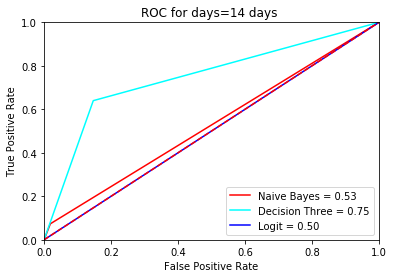

In [145]:
#ROC curve elapse workdays =14
plt.plot(rates4.fpr4, rates4.tpr4, 'b',color='red', label = 'Naive Bayes = %0.2f' % roc_auc4)
plt.plot(rates5.fpr5, rates5.tpr5, 'b',color='cyan', label = 'Decision Three = %0.2f' % roc_auc5)
plt.plot(rates6.fpr6, rates6.tpr6, 'b',color='blue',label = 'Logit = %0.2f' % roc_auc6)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC for days=14 days ')
plt.legend(loc = 'lower right')
plt.show()